In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler


font_path = "./Hakgyoansim Badasseugi TTF B.ttf"
ft = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = ft.get_name()

sns.set_theme(style="whitegrid", palette="pastel")
df = pd.read_csv("HousingData.csv")


1> 직선 그래프를 그리면 전반적인 변수들의 상관관계를 대략적으로 파악할 수 있다. 하지만 변수가 너무 많아서 비교하는데 어려움은 존재한다 

C:\Users\santa\AppData\Local\Temp\ipykernel_27780\355263464.py:16: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\santa\AppData\Local\Temp\ipykernel_27780\355263464.py:16: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\santa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\santa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


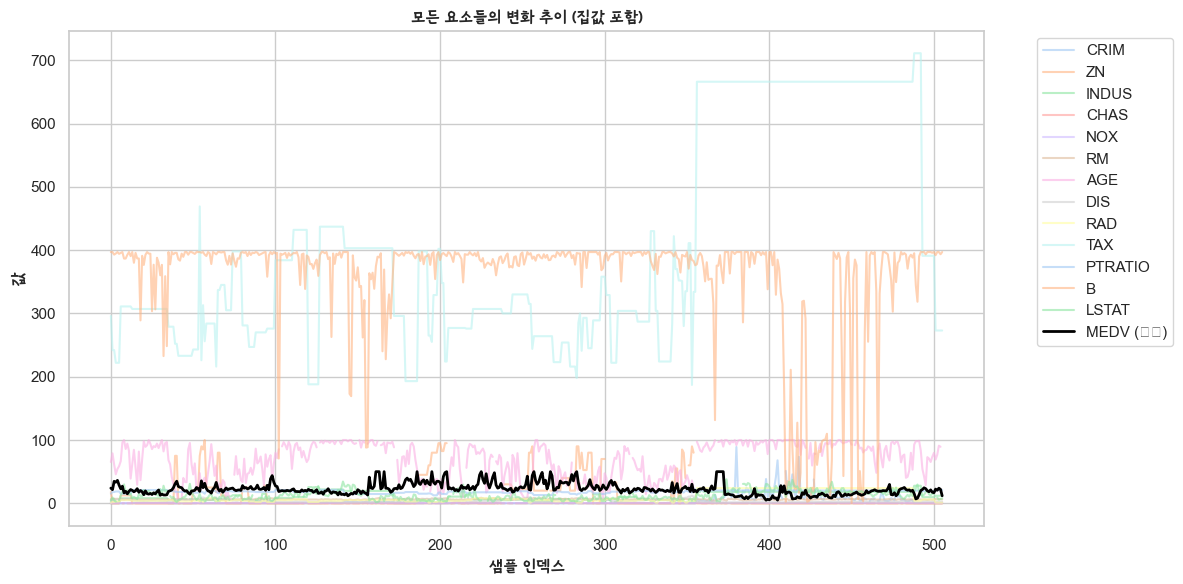

In [101]:
fig, ax = plt.subplots(figsize=(12, 6))

for col in df.columns:
    if col != 'MEDV':
        ax.plot(df[col], label=col, alpha=0.6)
    else:
        ax.plot(df[col], label='MEDV (집값)', color='black', linewidth=2)


ax.set_title("모든 요소들의 변화 추이 (집값 포함)", fontproperties=ft)
ax.set_xlabel("샘플 인덱스", fontproperties=ft)
ax.set_ylabel("값", fontproperties=ft)

# 범례 및 출력
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


특정 변수를 선택해서 정규화를 하고 경향성을 파악하는것도 가능하다.

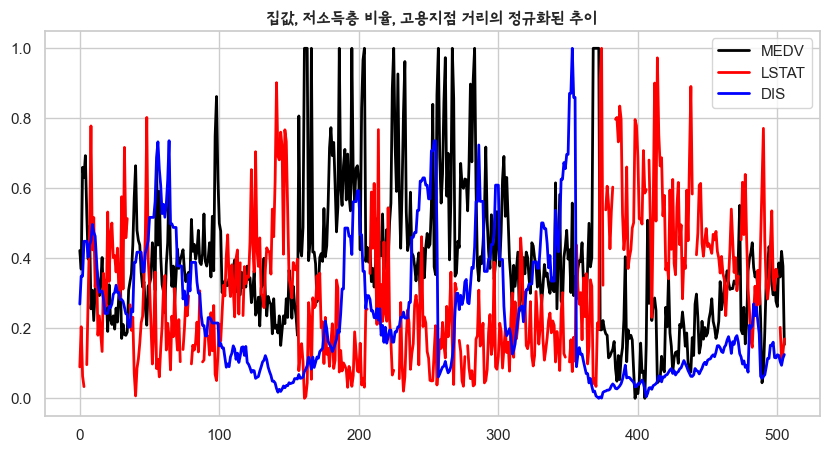

In [ ]:
idx = ['MEDV', 'LSTAT', 'DIS']

# 정규화도 가능합니다.
scaler = MinMaxScaler()
scaled_selected = scaler.fit_transform(df[idx])
scaled_df = pd.DataFrame(scaled_selected, columns=idx)
scaled_df['Index'] = range(len(df)) 

color_map = {
    'MEDV': 'black',
    'LSTAT': 'red',
    'DIS': 'blue'
}

fig, ax = plt.subplots(figsize=(10, 5))
for col in idx:
    ax.plot(scaled_df['Index'], scaled_df[col], label=col, linewidth=2, color=color_map[col])

ax.set_title("집값, 저소득층 비율, 고용지점 거리의 추이 선그래프", fontproperties=ft)
ax.legend()
plt.show()

2> 2가지 변수에 대해서 파악을 할 때 사용할 수 있는 산점도 그래프이다다. 집값이 특정 변수에 영향을 받는지 파악이 가능하다. 

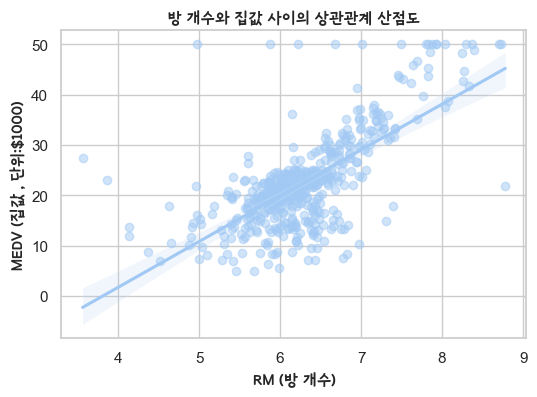

In [79]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x="RM", y="MEDV", data=df, scatter_kws={"alpha": 0.5}, ax=ax)
ax.set_title("방 개수와 집값 사이의 상관관계 산점도", fontproperties=ft)
ax.set_xlabel("RM (방 개수)", fontproperties=ft)
ax.set_ylabel("MEDV (집값 , 단위:$1000)", fontproperties=ft)
plt.show()


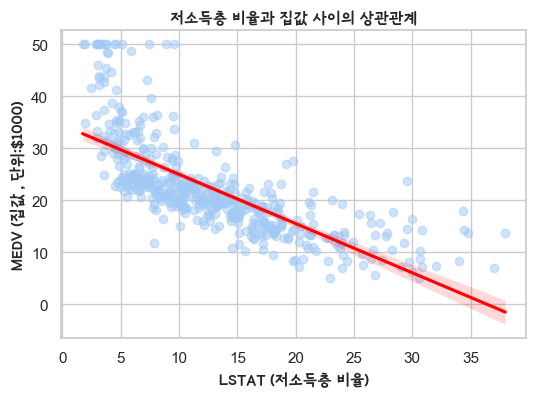

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(x="LSTAT", y="MEDV", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("저소득층 비율과 집값 사이의 상관관계", fontproperties=ft)
plt.xlabel("LSTAT (저소득층 비율)", fontproperties=ft)
plt.ylabel("MEDV (집값 , 단위:$1000)", fontproperties=ft)
plt.show()

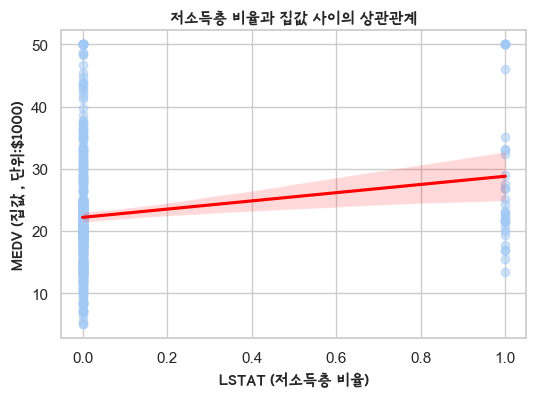

In [97]:
plt.figure(figsize=(6, 4))
sns.regplot(x="CHAS", y="MEDV", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("저소득층 비율과 집값 사이의 상관관계", fontproperties=ft)
plt.xlabel("LSTAT (저소득층 비율)", fontproperties=ft)
plt.ylabel("MEDV (집값 , 단위:$1000)", fontproperties=ft)
plt.show()

LSTAT와 RM 은 연관관계가 있고, CHAS는 관계성이 크게 보이지 않는다는 결론 도출이 가능하다.

3> 모든 변수들이 얼마나 관련있는지를 한번에 보여주는 히트맵이다. -1 OR +1 에 가까울수록 상관관계가 있다는 뜻이다. (부정적 혹은 긍정적으로)

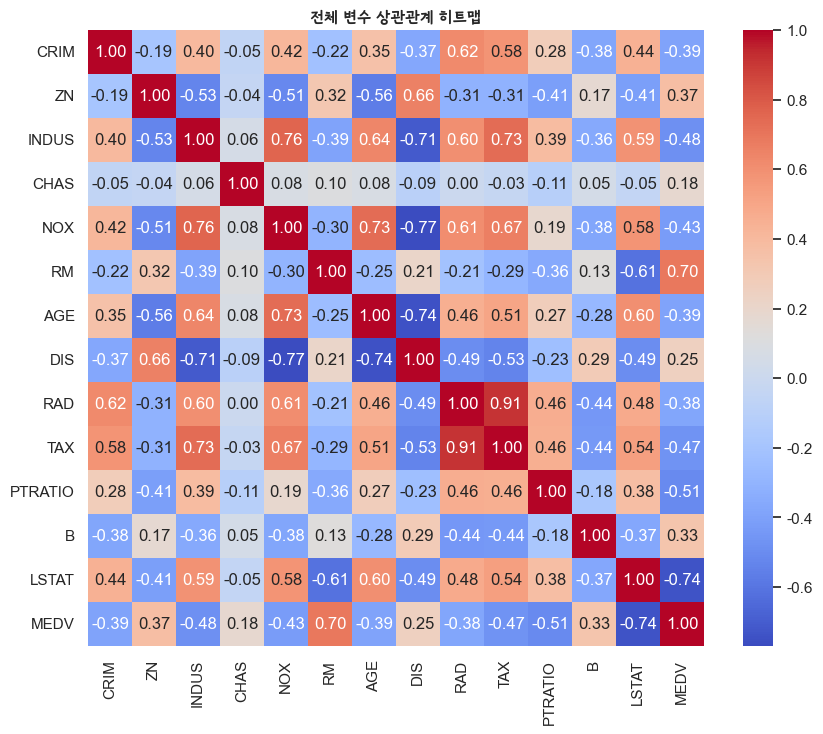

In [89]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("전체 변수 상관관계 히트맵", fontproperties=ft)
plt.show()


집값과만 연관성이 있는 변수들을 비교하는것이 목표이므로, medv를 혼자  x축에 두고 비교하는것도 가능하다.

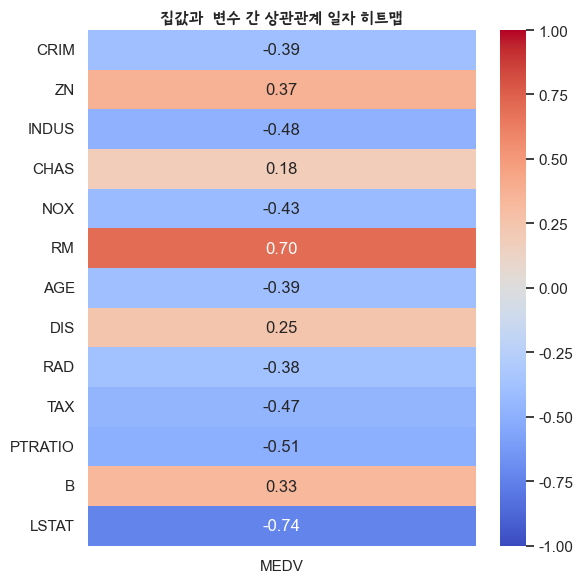

In [96]:
medv_corr = df.corr()[["MEDV"]].drop("MEDV")

plt.figure(figsize=(6, 6))
sns.heatmap(medv_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

plt.title("집값과  변수 간 상관관계 일자 히트맵", fontproperties=ft)
plt.tight_layout()
plt.show()

이러한 과정을 통해 얻을 수 있는 비즈니스 시사점 :

- 방 개수, 저소득층 비율은 집값의 영향을 미친다. 
- 고용지점의 거리와 재산세 강 인접 여부 등도 집값에 어느정도 영향을 미칠 수 있다.

부동산 개발 및 투자전략을 수립하는데 이러한 요소들을 반영할 수 있다.
예를들어 LSTAT 비율이 높은 지역은 재개발, 개선이 필요하며, 집값상승과 관련있는 요소를 중심으로 개발 부지를 선정하는 정책 수립이 가능하다.

TAX가 높은 지역에서 세금 인하 or 인센티브 제공을 통해 주택시장 안정화가 가능하며 
정책 입안자는 LSTAT와 MEDV 간 음의 상관관계를 통해 복지·지원 정책 타깃 지역 설정

마지막으로, 도시 인프라 혹은 시설 개발 계획에 이런 데이터를 사용이 가능한데
DIS(고용지점 거리)와 관계성을 통해 부지 혹은 대중교통 개발방향도 파악이 가능하고,  녹지/수변 개발의 경제적 타당성 검토에 이용횔 수 있다.